<a href="https://colab.research.google.com/github/MOHAMEDAAKIFASRAR/Ex-5--AAI/blob/main/EX5_AAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

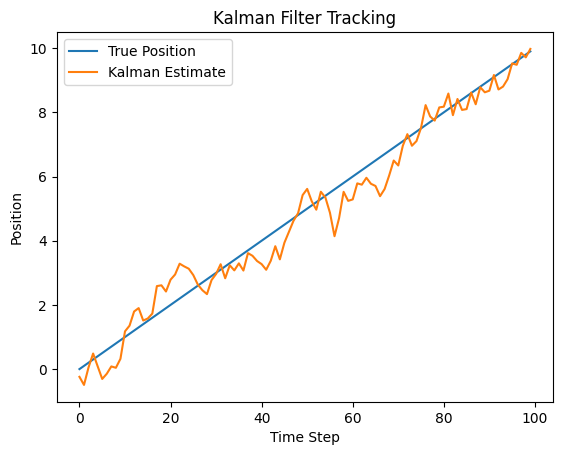

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# -----------------------------------
# Define Kalman Filter Class
# -----------------------------------
class KalmanFilter:

    def __init__(self, F, H, Q, R, x0, P0):
        # Store system matrices
        self.F = F      # State transition matrix
        self.H = H      # Observation matrix
        self.Q = Q      # Process noise covariance
        self.R = R      # Measurement noise covariance

        # Initialize state and covariance
        self.x = x0     # Initial state [position, velocity]
        self.P = P0     # Initial uncertainty covariance matrix

    # -----------------------------------
    # Prediction Step
    # -----------------------------------
    def predict(self):
        # Predict next state
        # x̂ = F * x
        self.x = self.F @ self.x

        # Predict next covariance
        # P = F * P * F^T + Q
        self.P = self.F @ self.P @ self.F.T + self.Q

    # -----------------------------------
    # Update Step
    # -----------------------------------
    def update(self, z):
        # Innovation (measurement residual)
        # y = z - Hx
        y = z - self.H @ self.x

        # Innovation covariance
        # S = HPH^T + R
        S = self.H @ self.P @ self.H.T + self.R

        # Kalman Gain
        # K = P H^T S^-1
        K = self.P @ self.H.T @ np.linalg.inv(S)

        # Updated state estimate
        # x = x + K*y
        self.x = self.x + K @ y

        # Updated covariance
        # P = (I - KH)P
        I = np.eye(self.F.shape[0])
        self.P = (I - K @ self.H) @ self.P


# -----------------------------------
# Define System Parameters
# -----------------------------------

dt = 0.1  # Time step

# State transition matrix (constant velocity model)
F = np.array([[1, dt],
              [0, 1]])

# Observation matrix (we measure only position)
H = np.array([[1, 0]])

# Process noise covariance (model uncertainty)
Q = np.diag([0.1, 0.1])

# Measurement noise covariance (sensor noise)
R = np.array([[1]])

# Initial state: position = 0, velocity = 0
x0 = np.array([0, 0])

# Initial uncertainty
P0 = np.diag([1, 1])

# Create Kalman Filter object
kf = KalmanFilter(F, H, Q, R, x0, P0)


# -----------------------------------
# Generate True States and Noisy Measurements
# -----------------------------------

true_states = []
measurements = []

for i in range(100):
    # True motion: constant velocity = 1
    true_position = i * dt
    true_velocity = 1

    true_states.append([true_position, true_velocity])

    # Add Gaussian noise to position measurement
    noisy_measurement = true_position + np.random.normal(scale=1)
    measurements.append(noisy_measurement)


# -----------------------------------
# Apply Kalman Filter to Measurements
# -----------------------------------

est_states = []

for z in measurements:
    kf.predict()                   # Step 1: Predict next state
    kf.update(np.array([z]))       # Step 2: Correct using measurement
    est_states.append(kf.x.copy())


# -----------------------------------
# Plot Results
# -----------------------------------

plt.plot([s[0] for s in true_states], label="True Position")
plt.plot([s[0] for s in est_states], label="Kalman Estimate")

plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Kalman Filter Tracking")
plt.show()
